In [2]:
!pip install segmentation-models-pytorch

In [3]:
!pip install torchsummary

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
from torch.utils.data import Dataset , DataLoader
from torchvision import transforms as T
import torchvision
import torch.nn.functional as F
from torch.autograd import Variable

from PIL import Image
import cv2
import albumentations as A

import time 
from tqdm.notebook import tqdm
from torchsummary import summary
import segmentation_models_pytorch as smp

device =torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
os.mkdir('./AUG_DATA')
os.mkdir('./AUG_DATA/train')
os.mkdir('./AUG_DATA/masks')

In [ ]:
import tensorflow as tf
import glob
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from skimage.transform import AffineTransform, warp
from skimage import io, img_as_ubyte
import random
import os 
from scipy.ndimage import rotate
from albumentations.augmentations.crops.transforms import CropNonEmptyMaskIfExists, RandomCrop
import albumentations as A

# AUGUMENTATION
IMAGES_TO_GENERATE = 1000

images_path = '../input/ml-challenge-data/image_chips'
mask_path = '../input/ml-challenge-data/target_data'

img_aug_path = './AUG_DATA/train'
mask_aug_path = './AUG_DATA/masks'

images= []
masks = []

for im in os.listdir(images_path):
    images.append(os.path.join(images_path,im))
for msk in os.listdir(mask_path):
    masks.append(os.path.join(mask_path,msk))

aug = A.Compose([
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.HorizontalFlip(p=1),
    A.Transpose(p=1),
    A.GridDistortion(p=1),
    CropNonEmptyMaskIfExists(p=0.3,height=512,width=512),
    A.geometric.rotate.Rotate (limit=90, interpolation=1, border_mode=4, value=None, mask_value=None, always_apply=False, p=0.5),
])

i=1

while i<=IMAGES_TO_GENERATE:
    number= random.randint(0,len(images)-1)
    image = images[number]
    mask = masks[number]
    print(image,mask)
    original_image =io.imread(image)
    original_mask =io.imread(mask)    
    augmented = aug(image=original_image,mask=original_mask)
    transformed_image = augmented['image']
    transformed_mask = augmented['mask']    
    
    new_image_path ='%s/%s.png'%(img_aug_path,i) 
    new_mask_path ='%s/%s.png'%(mask_aug_path,i) 
    print(new_image_path)
    io.imsave(new_image_path,transformed_image)
    io.imsave(new_mask_path,transformed_mask)
    i=i+1

../input/ml-challenge-data/image_chips/H2613.jpg ../input/ml-challenge-data/target_data/H2613.jpg
./AUG_DATA/train/1.png
../input/ml-challenge-data/image_chips/H030.jpg ../input/ml-challenge-data/target_data/H030.jpg
./AUG_DATA/train/2.png
../input/ml-challenge-data/image_chips/H330.jpg ../input/ml-challenge-data/target_data/H330.jpg
./AUG_DATA/train/3.png
../input/ml-challenge-data/image_chips/J132.jpg ../input/ml-challenge-data/target_data/J132.jpg
./AUG_DATA/train/4.png
../input/ml-challenge-data/image_chips/H616.jpg ../input/ml-challenge-data/target_data/H616.jpg
./AUG_DATA/train/5.png
../input/ml-challenge-data/image_chips/G2712.jpg ../input/ml-challenge-data/target_data/G2712.jpg
./AUG_DATA/train/6.png
../input/ml-challenge-data/image_chips/G051.jpg ../input/ml-challenge-data/target_data/G051.jpg
./AUG_DATA/train/7.png
../input/ml-challenge-data/image_chips/H565.jpg ../input/ml-challenge-data/target_data/H565.jpg
./AUG_DATA/train/8.png
../input/ml-challenge-data/image_chips/H509.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: ./AUG_DATA/masks/30.png is a low contrast image


../input/ml-challenge-data/image_chips/4J02.jpg ../input/ml-challenge-data/target_data/4J02.jpg
./AUG_DATA/train/31.png
../input/ml-challenge-data/image_chips/J144.jpg ../input/ml-challenge-data/target_data/J144.jpg
./AUG_DATA/train/32.png
../input/ml-challenge-data/image_chips/H838.jpg ../input/ml-challenge-data/target_data/H838.jpg
./AUG_DATA/train/33.png
../input/ml-challenge-data/image_chips/H078.jpg ../input/ml-challenge-data/target_data/H078.jpg
./AUG_DATA/train/34.png
../input/ml-challenge-data/image_chips/J2522.jpg ../input/ml-challenge-data/target_data/J2522.jpg
./AUG_DATA/train/35.png
../input/ml-challenge-data/image_chips/H2708.jpg ../input/ml-challenge-data/target_data/H2708.jpg
./AUG_DATA/train/36.png
../input/ml-challenge-data/image_chips/1J01.jpg ../input/ml-challenge-data/target_data/1J01.jpg
./AUG_DATA/train/37.png
../input/ml-challenge-data/image_chips/L704.jpg ../input/ml-challenge-data/target_data/L704.jpg
./AUG_DATA/train/38.png
../input/ml-challenge-data/image_chi

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: ./AUG_DATA/masks/41.png is a low contrast image


../input/ml-challenge-data/image_chips/H330.jpg ../input/ml-challenge-data/target_data/H330.jpg
./AUG_DATA/train/42.png
../input/ml-challenge-data/image_chips/J454.jpg ../input/ml-challenge-data/target_data/J454.jpg
./AUG_DATA/train/43.png
../input/ml-challenge-data/image_chips/H2769.jpg ../input/ml-challenge-data/target_data/H2769.jpg
./AUG_DATA/train/44.png
../input/ml-challenge-data/image_chips/J2526.jpg ../input/ml-challenge-data/target_data/J2526.jpg
./AUG_DATA/train/45.png
../input/ml-challenge-data/image_chips/H2834.jpg ../input/ml-challenge-data/target_data/H2834.jpg
./AUG_DATA/train/46.png
../input/ml-challenge-data/image_chips/H289.jpg ../input/ml-challenge-data/target_data/H289.jpg


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: ./AUG_DATA/masks/46.png is a low contrast image


./AUG_DATA/train/47.png
../input/ml-challenge-data/image_chips/G874.jpg ../input/ml-challenge-data/target_data/G874.jpg
./AUG_DATA/train/48.png
../input/ml-challenge-data/image_chips/J883.jpg ../input/ml-challenge-data/target_data/J883.jpg
./AUG_DATA/train/49.png
../input/ml-challenge-data/image_chips/J374.jpg ../input/ml-challenge-data/target_data/J374.jpg
./AUG_DATA/train/50.png
../input/ml-challenge-data/image_chips/H902.jpg ../input/ml-challenge-data/target_data/H902.jpg
./AUG_DATA/train/51.png
../input/ml-challenge-data/image_chips/J546.jpg ../input/ml-challenge-data/target_data/J546.jpg
./AUG_DATA/train/52.png
../input/ml-challenge-data/image_chips/J373.jpg ../input/ml-challenge-data/target_data/J373.jpg
./AUG_DATA/train/53.png
../input/ml-challenge-data/image_chips/H525.jpg ../input/ml-challenge-data/target_data/H525.jpg
./AUG_DATA/train/54.png
../input/ml-challenge-data/image_chips/G2772.jpg ../input/ml-challenge-data/target_data/G2772.jpg
./AUG_DATA/train/55.png
../input/ml-ch

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: ./AUG_DATA/masks/60.png is a low contrast image


../input/ml-challenge-data/image_chips/H327.jpg ../input/ml-challenge-data/target_data/H327.jpg
./AUG_DATA/train/61.png
../input/ml-challenge-data/image_chips/J495.jpg ../input/ml-challenge-data/target_data/J495.jpg
./AUG_DATA/train/62.png
../input/ml-challenge-data/image_chips/G2772.jpg ../input/ml-challenge-data/target_data/G2772.jpg
./AUG_DATA/train/63.png
../input/ml-challenge-data/image_chips/J2526.jpg ../input/ml-challenge-data/target_data/J2526.jpg
./AUG_DATA/train/64.png
../input/ml-challenge-data/image_chips/J332.jpg ../input/ml-challenge-data/target_data/J332.jpg
./AUG_DATA/train/65.png
../input/ml-challenge-data/image_chips/J430.jpg ../input/ml-challenge-data/target_data/J430.jpg
./AUG_DATA/train/66.png
../input/ml-challenge-data/image_chips/H2765.jpg ../input/ml-challenge-data/target_data/H2765.jpg
./AUG_DATA/train/67.png
../input/ml-challenge-data/image_chips/H2517.jpg ../input/ml-challenge-data/target_data/H2517.jpg
./AUG_DATA/train/68.png
../input/ml-challenge-data/image

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: ./AUG_DATA/masks/88.png is a low contrast image


../input/ml-challenge-data/image_chips/J132.jpg ../input/ml-challenge-data/target_data/J132.jpg
./AUG_DATA/train/89.png
../input/ml-challenge-data/image_chips/H243.jpg ../input/ml-challenge-data/target_data/H243.jpg
./AUG_DATA/train/90.png
../input/ml-challenge-data/image_chips/4J02.jpg ../input/ml-challenge-data/target_data/4J02.jpg
./AUG_DATA/train/91.png
../input/ml-challenge-data/image_chips/H078.jpg ../input/ml-challenge-data/target_data/H078.jpg
./AUG_DATA/train/92.png
../input/ml-challenge-data/image_chips/G2712.jpg ../input/ml-challenge-data/target_data/G2712.jpg
./AUG_DATA/train/93.png


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: ./AUG_DATA/masks/93.png is a low contrast image


../input/ml-challenge-data/image_chips/G799.jpg ../input/ml-challenge-data/target_data/G799.jpg
./AUG_DATA/train/94.png
../input/ml-challenge-data/image_chips/J638.jpg ../input/ml-challenge-data/target_data/J638.jpg
./AUG_DATA/train/95.png
../input/ml-challenge-data/image_chips/H696.jpg ../input/ml-challenge-data/target_data/H696.jpg
./AUG_DATA/train/96.png
../input/ml-challenge-data/image_chips/J332.jpg ../input/ml-challenge-data/target_data/J332.jpg
./AUG_DATA/train/97.png
../input/ml-challenge-data/image_chips/H388.jpg ../input/ml-challenge-data/target_data/H388.jpg
./AUG_DATA/train/98.png
../input/ml-challenge-data/image_chips/H585.jpg ../input/ml-challenge-data/target_data/H585.jpg
./AUG_DATA/train/99.png
../input/ml-challenge-data/image_chips/J854.jpg ../input/ml-challenge-data/target_data/J854.jpg
./AUG_DATA/train/100.png
../input/ml-challenge-data/image_chips/H2550.jpg ../input/ml-challenge-data/target_data/H2550.jpg
./AUG_DATA/train/101.png
../input/ml-challenge-data/image_chi

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: ./AUG_DATA/masks/112.png is a low contrast image


../input/ml-challenge-data/image_chips/H327.jpg ../input/ml-challenge-data/target_data/H327.jpg
./AUG_DATA/train/113.png
../input/ml-challenge-data/image_chips/J387.jpg ../input/ml-challenge-data/target_data/J387.jpg
./AUG_DATA/train/114.png
../input/ml-challenge-data/image_chips/J2521.jpg ../input/ml-challenge-data/target_data/J2521.jpg
./AUG_DATA/train/115.png
../input/ml-challenge-data/image_chips/J357.jpg ../input/ml-challenge-data/target_data/J357.jpg
./AUG_DATA/train/116.png
../input/ml-challenge-data/image_chips/J2515.jpg ../input/ml-challenge-data/target_data/J2515.jpg
./AUG_DATA/train/117.png
../input/ml-challenge-data/image_chips/H108.jpg ../input/ml-challenge-data/target_data/H108.jpg
./AUG_DATA/train/118.png
../input/ml-challenge-data/image_chips/6J01.jpg ../input/ml-challenge-data/target_data/6J01.jpg
./AUG_DATA/train/119.png
../input/ml-challenge-data/image_chips/H006.jpg ../input/ml-challenge-data/target_data/H006.jpg
./AUG_DATA/train/120.png
../input/ml-challenge-data/i

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: ./AUG_DATA/masks/139.png is a low contrast image


../input/ml-challenge-data/image_chips/H2708.jpg ../input/ml-challenge-data/target_data/H2708.jpg
./AUG_DATA/train/140.png
../input/ml-challenge-data/image_chips/G051.jpg ../input/ml-challenge-data/target_data/G051.jpg
./AUG_DATA/train/141.png
../input/ml-challenge-data/image_chips/H2517.jpg ../input/ml-challenge-data/target_data/H2517.jpg
./AUG_DATA/train/142.png
../input/ml-challenge-data/image_chips/6J01.jpg ../input/ml-challenge-data/target_data/6J01.jpg
./AUG_DATA/train/143.png
../input/ml-challenge-data/image_chips/H585.jpg ../input/ml-challenge-data/target_data/H585.jpg
./AUG_DATA/train/144.png


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: ./AUG_DATA/masks/144.png is a low contrast image


../input/ml-challenge-data/image_chips/H2550.jpg ../input/ml-challenge-data/target_data/H2550.jpg
./AUG_DATA/train/145.png
../input/ml-challenge-data/image_chips/4J02.jpg ../input/ml-challenge-data/target_data/4J02.jpg
./AUG_DATA/train/146.png
../input/ml-challenge-data/image_chips/J204.jpg ../input/ml-challenge-data/target_data/J204.jpg
./AUG_DATA/train/147.png
../input/ml-challenge-data/image_chips/H525.jpg ../input/ml-challenge-data/target_data/H525.jpg
./AUG_DATA/train/148.png
../input/ml-challenge-data/image_chips/J586.jpg ../input/ml-challenge-data/target_data/J586.jpg
./AUG_DATA/train/149.png
../input/ml-challenge-data/image_chips/J144.jpg ../input/ml-challenge-data/target_data/J144.jpg
./AUG_DATA/train/150.png
../input/ml-challenge-data/image_chips/H388.jpg ../input/ml-challenge-data/target_data/H388.jpg
./AUG_DATA/train/151.png
../input/ml-challenge-data/image_chips/H616.jpg ../input/ml-challenge-data/target_data/H616.jpg
./AUG_DATA/train/152.png
../input/ml-challenge-data/ima

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: ./AUG_DATA/masks/180.png is a low contrast image


../input/ml-challenge-data/image_chips/H755.jpg ../input/ml-challenge-data/target_data/H755.jpg
./AUG_DATA/train/181.png
../input/ml-challenge-data/image_chips/J854.jpg ../input/ml-challenge-data/target_data/J854.jpg
./AUG_DATA/train/182.png
../input/ml-challenge-data/image_chips/H2765.jpg ../input/ml-challenge-data/target_data/H2765.jpg
./AUG_DATA/train/183.png
../input/ml-challenge-data/image_chips/H2517.jpg ../input/ml-challenge-data/target_data/H2517.jpg
./AUG_DATA/train/184.png
../input/ml-challenge-data/image_chips/G799.jpg ../input/ml-challenge-data/target_data/G799.jpg
./AUG_DATA/train/185.png
../input/ml-challenge-data/image_chips/J180.jpg ../input/ml-challenge-data/target_data/J180.jpg
./AUG_DATA/train/186.png
../input/ml-challenge-data/image_chips/H006.jpg ../input/ml-challenge-data/target_data/H006.jpg
./AUG_DATA/train/187.png
../input/ml-challenge-data/image_chips/G2653.jpg ../input/ml-challenge-data/target_data/G2653.jpg
./AUG_DATA/train/188.png


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: ./AUG_DATA/masks/188.png is a low contrast image


../input/ml-challenge-data/image_chips/H108.jpg ../input/ml-challenge-data/target_data/H108.jpg
./AUG_DATA/train/189.png
../input/ml-challenge-data/image_chips/H616.jpg ../input/ml-challenge-data/target_data/H616.jpg
./AUG_DATA/train/190.png
../input/ml-challenge-data/image_chips/H289.jpg ../input/ml-challenge-data/target_data/H289.jpg
./AUG_DATA/train/191.png
../input/ml-challenge-data/image_chips/J2513.jpg ../input/ml-challenge-data/target_data/J2513.jpg
./AUG_DATA/train/192.png
../input/ml-challenge-data/image_chips/J629.jpg ../input/ml-challenge-data/target_data/J629.jpg
./AUG_DATA/train/193.png
../input/ml-challenge-data/image_chips/H513.jpg ../input/ml-challenge-data/target_data/H513.jpg
./AUG_DATA/train/194.png
../input/ml-challenge-data/image_chips/H838.jpg ../input/ml-challenge-data/target_data/H838.jpg
./AUG_DATA/train/195.png
../input/ml-challenge-data/image_chips/H391.jpg ../input/ml-challenge-data/target_data/H391.jpg
./AUG_DATA/train/196.png
../input/ml-challenge-data/ima

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: ./AUG_DATA/masks/261.png is a low contrast image


../input/ml-challenge-data/image_chips/H2840.jpg ../input/ml-challenge-data/target_data/H2840.jpg
./AUG_DATA/train/262.png
../input/ml-challenge-data/image_chips/H434.jpg ../input/ml-challenge-data/target_data/H434.jpg
./AUG_DATA/train/263.png
../input/ml-challenge-data/image_chips/3J02.jpg ../input/ml-challenge-data/target_data/3J02.jpg
./AUG_DATA/train/264.png
../input/ml-challenge-data/image_chips/G799.jpg ../input/ml-challenge-data/target_data/G799.jpg
./AUG_DATA/train/265.png
../input/ml-challenge-data/image_chips/J357.jpg ../input/ml-challenge-data/target_data/J357.jpg
./AUG_DATA/train/266.png
../input/ml-challenge-data/image_chips/J189.jpg ../input/ml-challenge-data/target_data/J189.jpg
./AUG_DATA/train/267.png
../input/ml-challenge-data/image_chips/J2522.jpg ../input/ml-challenge-data/target_data/J2522.jpg
./AUG_DATA/train/268.png
../input/ml-challenge-data/image_chips/J637.jpg ../input/ml-challenge-data/target_data/J637.jpg
./AUG_DATA/train/269.png
../input/ml-challenge-data/i

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: ./AUG_DATA/masks/271.png is a low contrast image


../input/ml-challenge-data/image_chips/J114.jpg ../input/ml-challenge-data/target_data/J114.jpg
./AUG_DATA/train/272.png
../input/ml-challenge-data/image_chips/H612.jpg ../input/ml-challenge-data/target_data/H612.jpg
./AUG_DATA/train/273.png
../input/ml-challenge-data/image_chips/H289.jpg ../input/ml-challenge-data/target_data/H289.jpg
./AUG_DATA/train/274.png
../input/ml-challenge-data/image_chips/J132.jpg ../input/ml-challenge-data/target_data/J132.jpg
./AUG_DATA/train/275.png
../input/ml-challenge-data/image_chips/H2769.jpg ../input/ml-challenge-data/target_data/H2769.jpg
./AUG_DATA/train/276.png
../input/ml-challenge-data/image_chips/J332.jpg ../input/ml-challenge-data/target_data/J332.jpg
./AUG_DATA/train/277.png
../input/ml-challenge-data/image_chips/H363.jpg ../input/ml-challenge-data/target_data/H363.jpg
./AUG_DATA/train/278.png
../input/ml-challenge-data/image_chips/H388.jpg ../input/ml-challenge-data/target_data/H388.jpg
./AUG_DATA/train/279.png
../input/ml-challenge-data/ima

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: ./AUG_DATA/masks/309.png is a low contrast image


../input/ml-challenge-data/image_chips/K384.jpg ../input/ml-challenge-data/target_data/K384.jpg
./AUG_DATA/train/310.png
../input/ml-challenge-data/image_chips/J2520.jpg ../input/ml-challenge-data/target_data/J2520.jpg
./AUG_DATA/train/311.png
../input/ml-challenge-data/image_chips/H2841.jpg ../input/ml-challenge-data/target_data/H2841.jpg
./AUG_DATA/train/312.png
../input/ml-challenge-data/image_chips/G2578.jpg ../input/ml-challenge-data/target_data/G2578.jpg
./AUG_DATA/train/313.png
../input/ml-challenge-data/image_chips/H243.jpg ../input/ml-challenge-data/target_data/H243.jpg
./AUG_DATA/train/314.png
../input/ml-challenge-data/image_chips/G2772.jpg ../input/ml-challenge-data/target_data/G2772.jpg
./AUG_DATA/train/315.png
../input/ml-challenge-data/image_chips/H696.jpg ../input/ml-challenge-data/target_data/H696.jpg
./AUG_DATA/train/316.png
../input/ml-challenge-data/image_chips/7J01.jpg ../input/ml-challenge-data/target_data/7J01.jpg
./AUG_DATA/train/317.png
../input/ml-challenge-da

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: ./AUG_DATA/masks/332.png is a low contrast image


../input/ml-challenge-data/image_chips/H2517.jpg ../input/ml-challenge-data/target_data/H2517.jpg
./AUG_DATA/train/333.png
../input/ml-challenge-data/image_chips/H585.jpg ../input/ml-challenge-data/target_data/H585.jpg
./AUG_DATA/train/334.png


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: ./AUG_DATA/masks/334.png is a low contrast image


../input/ml-challenge-data/image_chips/H243.jpg ../input/ml-challenge-data/target_data/H243.jpg
./AUG_DATA/train/335.png
../input/ml-challenge-data/image_chips/H696.jpg ../input/ml-challenge-data/target_data/H696.jpg
./AUG_DATA/train/336.png
../input/ml-challenge-data/image_chips/G051.jpg ../input/ml-challenge-data/target_data/G051.jpg
./AUG_DATA/train/337.png


In [11]:
images= "./AUG_DATA/train/"
targets= "./AUG_DATA/masks/"

n_classes = 2

def _df_():
  name = []
  for dirname ,_ , filenames in os.walk(images):
    for filename in filenames:
      name.append(filename.split('.')[0])
    
    return pd.DataFrame({'id':name} , index = np.arange(0, len(name)))

df = _df_()
print(len(df))

2400


In [12]:
X_train , X_val = train_test_split(df['id'].values , test_size
                                   =0.25, random_state =19)
print(f'Train : {len(X_train)}')
print(f'Val : {len(X_val)}')

Train : 1800
Val : 600


Image Size (512, 512, 3)
Mask Size (512, 512)


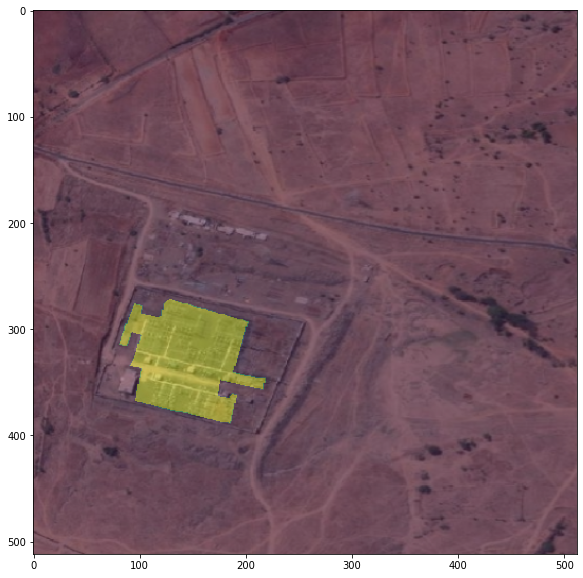

In [13]:
img = Image.open(images + df['id'][0] + '.png')
targ = Image.open(targets + df['id'][0] + '.png')

print('Image Size', np.asarray(img).shape)
print('Mask Size' , np.asarray(targ).shape)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.imshow(targ , alpha =0.4)
plt.show()

In [14]:
def dense_target(tar: np.ndarray):
    classes =np.unique(tar)
    dummy= np.zeros_like(tar)
    for idx , value in enumerate(classes):
        mask = np.where(tar == value)
        dummy[mask] = idx
    return dummy

#DATA LOADER
class SegData(Dataset):

  def __init__(self , image_path , target_path , X , mean , std , transform =None , test=False):
    self.image_path = image_path
    self.target_path = target_path
    self.X = X
    self.transform =transform
    self.mean = mean
    self.std = std
    self.test =test

  def __len__(self):
    return len(self.X)
  
  def __getitem__(self, idx):
    img = cv2.cvtColor(cv2.imread(self.image_path + self.X[idx] + '.png') , cv2.COLOR_BGR2RGB)
    target = cv2.imread(self.target_path + self.X[idx] + '.png' , cv2.IMREAD_GRAYSCALE)
    kernel_sharp = np.array(([-2, -2, -2], [-2, 17, -2], [-2, -2, -2]), dtype='int')
    img = cv2.filter2D(img, -1, kernel_sharp)
    target = cv2.filter2D(target, -1, kernel_sharp)
    img = cv2.resize(img, (512 , 512) , interpolation = cv2.INTER_NEAREST)
    target = cv2.resize(target , (512 , 512), interpolation = cv2.INTER_NEAREST)
    target = np.where( target > 0,255,0)
  
    if self.transform is not None:
      aug = self.transform(image = img , target = target )
      img = Image.fromarray(aug['image'])
      target = aug['target']
    
    if self.transform is None:
      img = Image.fromarray(img) 
    
    t = T.Compose([T.ToTensor() , T.Normalize(self.mean , self.std)])
    
    if self.test is False:
      img = t(img)
    target = dense_target(target)
    target = torch.from_numpy(target).long()
    return img ,target

In [15]:
mean = [0.485 ,0.456 ,0.406]
std = [0.229 , 0.224 , 0.225]

train_set = SegData(images, targets, X_train , mean, std)
val_set = SegData(images , targets , X_val , mean , std)

batch_size = 4
train_loader= DataLoader(train_set , batch_size= batch_size , shuffle =True)
val_loader = DataLoader(val_set , batch_size = batch_size , shuffle =True)

In [16]:
x , y =next(iter(train_loader))

print(f' x = shape : {x.shape} ; type :{x.dtype}')
print(f' x = min : {x.min()} ; max : {x.max()}')
print(f' y = shape: {y.shape}; class : {y.unique()}; type: {y.dtype}')

 x = shape : torch.Size([4, 3, 512, 512]) ; type :torch.float32
 x = min : -2.1179039478302 ; max : 2.640000104904175
 y = shape: torch.Size([4, 512, 512]); class : tensor([0, 1]); type: torch.int64


In [ ]:
model = smp.UnetPlusPlus('resnet50',encoder_weights='imagenet', classes = 2, activation=None,
                 encoder_depth= 5, decoder_channels=[256,128, 64, 32,16])
model=model.to(device)

In [ ]:
summary(model, input_size=(3, 512 , 512))

In [18]:
def pixel_wise_accuracy(output , mask):
  with torch.no_grad():
    output = torch.argmax(F.softmax(output , dim =1) , dim=1)
    correct = torch.eq(output , mask).int()
    accuracy = float(correct.sum())/ float(correct.numel())#total number
  return accuracy

In [19]:
def IoU(pred , true_pred , smooth =1e-10 , n_classes=2):
  with torch.no_grad():
    pred = torch.argmax(F.softmax(pred , dim =1) , dim=1)
    pred = pred.contiguous().view(-1)
    true_pred = true_pred.contiguous().view(-1)

    iou_class = []
    for value in range(0, n_classes):
      true_class = pred == value
      true_label = true_pred == value

      if true_label.long().sum().item()==0:
        iou_class.append(np.nan)
        
      else:
    
        inter = torch.logical_and(true_class, true_label).sum().float().item()
        union = torch.logical_or(true_class , true_label).sum().float().item()

        iou = (inter + smooth)/(union + smooth)
        iou_class.append(iou)

    return np.nanmean(iou_class)

In [20]:
def jaccard_loss(true, logits, eps=1e-7):
    num_classes = logits.shape[1]
    if num_classes == 1:
        true_1_hot = torch.eye(num_classes + 1)[true.squeeze(1)]
        true_1_hot = true_1_hot.permute(0, 3, 1, 2).float()
        true_1_hot_f = true_1_hot[:, 0:1, :, :]
        true_1_hot_s = true_1_hot[:, 1:2, :, :]
        true_1_hot = torch.cat([true_1_hot_s, true_1_hot_f], dim=1)
        pos_prob = torch.sigmoid(logits)
        neg_prob = 1 - pos_prob
        probas = torch.cat([pos_prob, neg_prob], dim=1)
    else:
        true_1_hot = torch.eye(num_classes)[true.squeeze(1)]
        true_1_hot = true_1_hot.permute(0, 3, 1, 2).float()
        probas = F.softmax(logits, dim=1)
    true_1_hot = true_1_hot.type(logits.type())
    dims = (0,) + tuple(range(2, true.ndimension()))
    intersection = torch.sum(probas * true_1_hot, dims)
    cardinality = torch.sum(probas + true_1_hot, dims)
    union = cardinality - intersection
    jacc_loss = (intersection / (union + eps)).mean()
    return (1 - jacc_loss)

In [21]:
def DiceBceLoss(true, logits, eps=1e-7):
    num_classes = logits.shape[1]
    if num_classes == 1:
        true_1_hot = torch.eye(num_classes + 1)[true.squeeze(1)]
        true_1_hot = true_1_hot.permute(0, 3, 1, 2).float()
        true_1_hot_f = true_1_hot[:, 0:1, :, :]
        true_1_hot_s = true_1_hot[:, 1:2, :, :]
        true_1_hot = torch.cat([true_1_hot_s, true_1_hot_f], dim=1)
        pos_prob = torch.sigmoid(logits)
        neg_prob = 1 - pos_prob
        probas = torch.cat([pos_prob, neg_prob], dim=1)
    else:
        true_1_hot = torch.eye(num_classes)[true.squeeze(1)]
        true_1_hot = true_1_hot.permute(0, 3, 1, 2).float()
        probas = F.softmax(logits, dim=1)
    true_1_hot = true_1_hot.type(logits.type())
    dims = (0,) + tuple(range(2, true.ndimension()))
    intersection = torch.sum(probas * true_1_hot, dims)
    cardinality = torch.sum(probas + true_1_hot, dims)
    dice_loss = 1- ((2.*intersection + eps)/(cardinality + eps)).mean()
    bce = F.cross_entropy(logits, true , reduction ="mean")
    dice_bce = bce + dice_loss
    return dice_bce

In [22]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit(epochs, model, train_loader, val_loader, optimizer, scheduler, patch=False):
    train_losses = []
    test_losses = []
    val_iou = []; val_acc = []
    train_iou = []; train_acc = []
    lrs = []
    min_loss = np.inf
    decrease = 1 ; not_improve=0

    model.to(device)
    fit_time = time.time()
    for e in range(epochs):
        since = time.time()
        running_loss = 0
        iou_score = 0
        accuracy = 0
        #training loop
        model.train()
        for i, data in enumerate(tqdm(train_loader)):
            #training phase
            image_tiles, mask_tiles = data
            if patch:
                bs, n_tiles, c, h, w = image_tiles.size()

                image_tiles = image_tiles.view(-1,c, h, w)
                mask_tiles = mask_tiles.view(-1, h, w)
            
            image = image_tiles.to(device); mask = mask_tiles.to(device);
            #forward
            output = model(image)
            loss = DiceBceLoss(mask, output)
            #evaluation metrics
            iou_score += IoU(output, mask)
            accuracy += pixel_wise_accuracy(output, mask)
            #backward
            loss.backward()
            optimizer.step() #update weight          
            optimizer.zero_grad() #reset gradient
            
            #step the learning rate
            lrs.append(get_lr(optimizer))
            scheduler.step() 
            
            running_loss += loss.item()
            
        else:
            model.eval()
            test_loss = 0
            test_accuracy = 0
            val_iou_score = 0
            #validation loop
            with torch.no_grad():
                for i, data in enumerate(tqdm(val_loader)):
                    #reshape to 9 patches from single image, delete batch size
                    image_tiles, mask_tiles = data

                    if patch:
                        bs, n_tiles, c, h, w = image_tiles.size()

                        image_tiles = image_tiles.view(-1,c, h, w)
                        mask_tiles = mask_tiles.view(-1, h, w)
                    
                    image = image_tiles.to(device); mask = mask_tiles.to(device);
                    output = model(image)
                    #evaluation metrics
                    val_iou_score +=  IoU(output, mask)
                    test_accuracy += pixel_wise_accuracy(output, mask)
                    #loss
                    loss = jaccard_loss(mask, output)                                  
                    test_loss += loss.item()
            
            #calculatio mean for each batch
            train_losses.append(running_loss/len(train_loader))
            test_losses.append(test_loss/len(val_loader))


            if min_loss > (test_loss/len(val_loader)):
                print('Loss Decreasing.. {:.3f} >> {:.3f} '.format(min_loss, (test_loss/len(val_loader))))
                min_loss = (test_loss/len(val_loader))
                decrease += 1
                print('saving model...')
                torch.save(model, 'model-{:.3f}.pt'.format(val_iou_score/len(val_loader)))
                    

            # if (test_loss/len(val_loader)) > min_loss:
            #     not_improve += 1
            #     min_loss = (test_loss/len(val_loader))
            #     print(f'Loss did not  Decrease for {not_improve} time')
            #     if not_improve == 7:
            #         print('Loss did not decrease for the 7th time , Stop Training')
            #         break
            
            #iou
            val_iou.append(val_iou_score/len(val_loader))
            train_iou.append(iou_score/len(train_loader))
            train_acc.append(accuracy/len(train_loader))
            val_acc.append(test_accuracy/ len(val_loader))
            print("Epoch:{}/{}..".format(e+1, epochs),
                  "Train Loss: {:.3f}..".format(running_loss/len(train_loader)),
                  "Val Loss: {:.3f}..".format(test_loss/len(val_loader)),
                  "Train IoU:{:.3f}..".format(iou_score/len(train_loader)),
                  "Val IoU: {:.3f}..".format(val_iou_score/len(val_loader)),
                  "Train Acc:{:.3f}..".format(accuracy/len(train_loader)),
                  "Val Acc:{:.3f}..".format(test_accuracy/len(val_loader)),
                  "Time: {:.2f}m".format((time.time()-since)/60))
        
    history = {'train_loss' : train_losses, 'val_loss': test_losses,
               'train_miou' :train_iou, 'val_miou':val_iou,
               'train_acc' :train_acc, 'val_acc':val_acc,
               'lrs': lrs}
    print('Total time: {:.2f} m' .format((time.time()- fit_time)/60))
    return history

In [ ]:
max_lr = 1e-3
epoch = 50
weight_decay = 1e-6

optimizer = torch.optim.Adam(model.parameters(), lr=max_lr, weight_decay=weight_decay)
sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epoch,
                                            steps_per_epoch=len(train_loader))

history = fit(epoch, model, train_loader, val_loader, optimizer, sched)

In [23]:
test_set = SegData(images, targets, X_val ,mean , std, transform = None , test = True)

In [24]:
def predict_image_mask(model, image , mask , mean=[0.485, 0.456, 0.406],
                       std = [0.229 , 0.224 ,0.225]):
  model.eval()
  t= T.Compose([T.ToTensor() ,T.Normalize(mean, std)])
  image = t(image)
  model.to(device) ; image = image.to(device)
  mask = mask.to(device)
  with torch.no_grad():

    image = image.unsqueeze(0)
    mask = mask.unsqueeze(0)

    output = model(image)
    score = IoU(output, mask)
    masked = torch.argmax(output , dim =1)
    masked = masked.cpu().squeeze(0)
  return masked , score

In [26]:
model = torch.load('./model.pth')

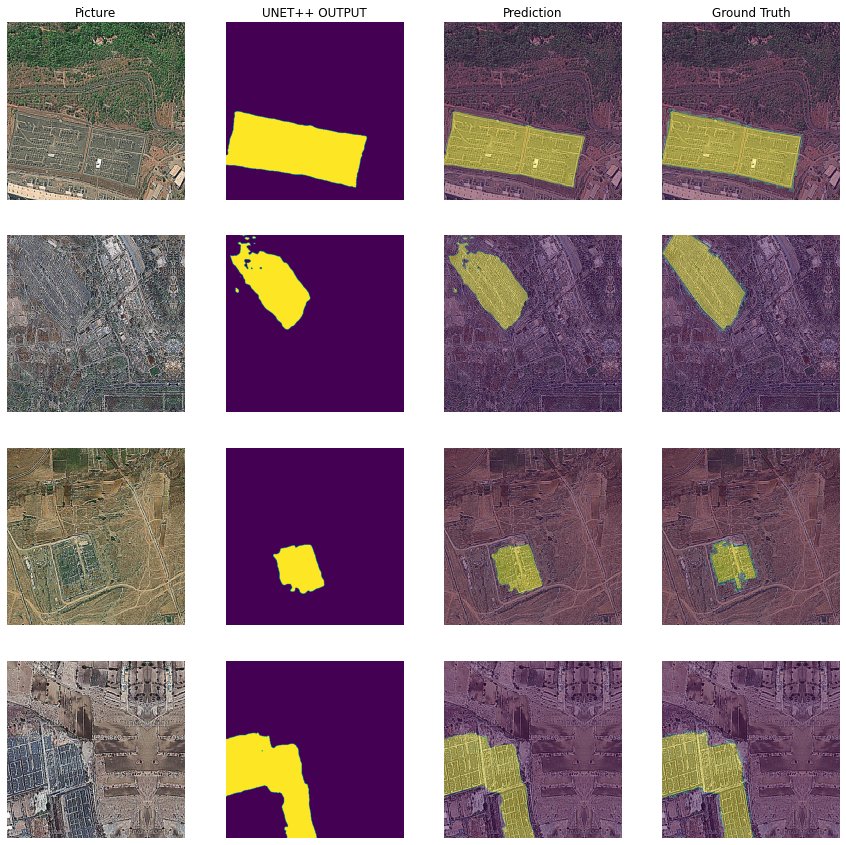

In [48]:


rows=4
cols = 4
img_count = 0

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
  
for i in range(rows):
    image , mask = test_set[i]
    pred_mask , score = predict_image_mask(model , image , mask)
    
    axes[0, 0].set_title('Picture');
    axes[0, 1].set_title('UNET++ OUTPUT')
    axes[0, 2].set_title('Prediction')
    axes[0, 3].set_title('Ground Truth')
    
    if img_count < len(images):
        axes[i, 0].imshow(image)
        axes[i, 0].set_axis_off()
        
        axes[i, 1].imshow(pred_mask)
        axes[i, 1].set_axis_off()
        
        axes[i, 2].imshow(image)
        axes[i, 2].imshow(pred_mask , alpha =0.4)
        axes[i, 2].set_axis_off()
        
        axes[i, 3].imshow(image)
        axes[i, 3].imshow(mask , alpha =0.4)
        axes[i, 3].set_axis_off()
        
plt.savefig('./out.jpg',dpi=300)

In [28]:
def predict_final_mask(model, image , mean=[0.485, 0.456, 0.406],
                       std = [0.229 , 0.224 ,0.225]):
  model.eval()
  t= T.Compose([T.ToTensor() ,T.Normalize(mean, std)])
  image = t(image)
  model.to(device) ; image = image.to(device)
  with torch.no_grad():

    image = image.unsqueeze(0)

    output = model(image)
    masked = torch.argmax(output , dim =1)
    masked = masked.cpu().squeeze(0)
  return masked

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
from torchvision import transforms as T

#cuda 
device =torch.device("cuda" if torch.cuda.is_available() else "cpu")

def predict_final_mask(model, image , mean=[0.485, 0.456, 0.406],
                       std = [0.229 , 0.224 ,0.225]):
  model.eval()
  t= T.Compose([T.ToTensor() ,T.Normalize(mean, std)])
  image = t(image)
  model.to(device) ; image = image.to(device)
  with torch.no_grad():

    image = image.unsqueeze(0)

    output = model(image)
    masked = torch.argmax(output , dim =1)
    masked = masked.cpu().squeeze(0).numpy()
  return masked



model = torch.load('./model.pth')

img = cv2.imread('../test_data/mosaic_test.jpg')
i=750
j=750
index = 1

final_output = np.zeros((3750,3750))

while i <= 3750:
    while j <=3750:
        cropped_image = img[i-750:i, j-750:j]
        im = cv2.cvtColor(cropped_image , cv2.COLOR_BGR2RGB)
        kernel_sharp = np.array(([-2, -2, -2], [-2, 17, -2], [-2, -2, -2]), dtype='int')
        im = cv2.filter2D(im, -1, kernel_sharp)
        im = cv2.resize(im, (512 , 512) , interpolation = cv2.INTER_NEAREST)
        masked_image = predict_final_mask(model,im)
        path = os.path.join('./output/','%s.png'%index)
        masked_image = cv2.resize(masked_image,(750,750),interpolation = cv2.INTER_NEAREST)
        final_output[i-750:i, j-750:j] = masked_image
        j=j+750
        index=index+1
    i=i+750
    j=750
plt.figure(figsize = (15,12) )
plt.imshow(final_output)
cv2.imwrite('./output.png',final_output)
np.save('./out_imds.npy',final_output)